In [51]:
import os
import glob
import numpy as np
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

In [52]:
# Calculate mean ximea white reference
data = []
for f in glob.glob('plastics_ximea_white/ximea/*'):
    data.append(np.load(f))
data = np.array(data)
white_ref = np.mean(data, axis=0)
np.save('./ximea_white_ref.npy',white_ref)

In [53]:
# Calculate mean imec white reference
data = []
for f in glob.glob('plastics_imec_white/imec/*'):
    data.append(np.load(f))
data = np.array(data)
white_ref = np.mean(data, axis=0)
np.save('./imec_white_ref.npy',white_ref)

In [54]:
# Calculate mean ximea dark reference
data = []
for f in glob.glob('plastics_dark/ximea/*'):
    data.append(np.load(f))
data = np.array(data)
dark_ref = np.mean(data, axis=0)
np.save('./ximea_dark_ref.npy',dark_ref)

In [70]:
# Calculate mean imec dark reference
data = []
for f in glob.glob('plastics_dark/imec/*'):
    data.append(np.load(f))
data = np.array(data)
dark_ref = np.mean(data, axis=0)
np.save('./imec_dark_ref.npy',dark_ref)

In [71]:
# Create the calibration function
def reflectance_calibrate(data: np.ndarray, white_ref: np.ndarray, dark_ref: np.ndarray) -> np.ndarray:
    return np.clip(np.divide(
            (data - dark_ref),
            (white_ref - dark_ref),
            out=np.zeros_like(data), 
            where=(white_ref - dark_ref)!=0
            ), 0, 2)

In [72]:
# Generate all the calibrated images
for folder in tqdm(glob.glob('./*')):
    print(folder)
    if os.path.isfile(folder) or 'dark' in folder or 'white' in folder:
        continue
    # Valid folder
    for cal_fol in ['ximea','imec']:
        # Load reference values
        white_ref = np.load(f'./{cal_fol}_white_ref.npy')
        dark_ref = np.load(f'./{cal_fol}_dark_ref.npy')
        try:
            os.mkdir(os.path.join(folder, f'{cal_fol}_cal'))
        except:
            print('Error making folder!')
        # Attempt to open all the item in the uncalibrated data
        for item in os.listdir(os.path.join(folder,cal_fol)):
            data = np.load(os.path.join(folder,cal_fol,item))
            cal_image = reflectance_calibrate(data, white_ref, dark_ref)
            # Save the calibrated data
            np.save(os.path.join(folder,f'{cal_fol}_cal',f'cal_{item}'),cal_image)

  0%|          | 0/19 [00:00<?, ?it/s]

./imec_white_ref.npy
./plastics_wet_wild_turbid
Error making folder!
Error making folder!
./ximea_white_ref.npy
./plastics_ximea_white
./ximea_dark_ref.npy
./plastics_dry_pure_sand
Error making folder!
Error making folder!
./plastics_checkerboard_1
Error making folder!
Error making folder!
./Calibrate_Data_Cubes.ipynb
./plastics_wet_pure
Error making folder!
Error making folder!
./plastics_imec_white
./imec_dark_ref.npy
./Register_Images.ipynb
./plastics_checkerboard_2
Error making folder!
Error making folder!
./plastics_dry
Error making folder!
Error making folder!
./plastics_wet_wild_settled
Error making folder!
Error making folder!
./plastics_teaser
Error making folder!
Error making folder!
./plastics_dark
./plastics_pure_sand
Error making folder!
Error making folder!
./plastics_dry_wild_sand
Error making folder!
Error making folder!


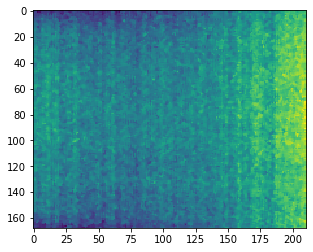

In [59]:
plt.imshow(dark_ref[:,:,1])

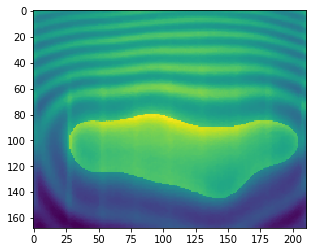

In [60]:
plt.imshow(white_ref[:,:,1])

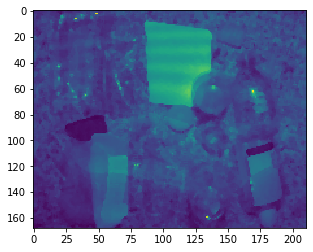

In [61]:
plt.imshow(data[:,:,1])

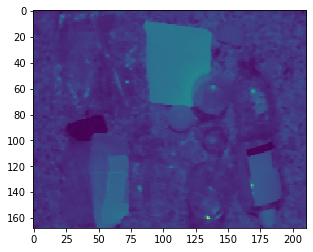

In [67]:
plt.imshow(cal_image[:,:,0])